In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()

## 기본 데이터 실습

In [ ]:
X = np.linspace(1, 10, 20)
X.shape

(20,)

In [ ]:
X = np.linspace(1, 10, 20)
y = 3*X + np.random.normal(size = (X.shape[0])) # 분산 추가

X = X.reshape(-1, 1)
print(X.shape)

lin_reg.fit(X,y)

(20, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.predict(X)

array([ 3.38829031,  4.78115601,  6.17402171,  7.56688741,  8.9597531 ,
       10.3526188 , 11.7454845 , 13.1383502 , 14.5312159 , 15.9240816 ,
       17.31694729, 18.70981299, 20.10267869, 21.49554439, 22.88841009,
       24.28127579, 25.67414148, 27.06700718, 28.45987288, 29.85273858])

In [ ]:
y

array([ 3.68986038,  3.96491544,  6.35411647,  6.5582672 ,  9.28264101,
       11.6205922 , 10.52683348, 13.6712086 , 14.99199341, 15.76966676,
       16.36050319, 19.20389679, 22.08018451, 20.6642619 , 23.32260476,
       23.5448373 , 26.54322501, 26.84080756, 28.24790659, 29.17196637])

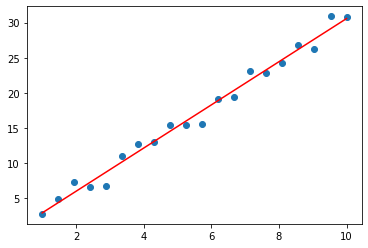

In [ ]:
plt.scatter(X, y)
plt.plot(X, lin_reg.predict(X), 'r-')

In [ ]:
lin_reg.coef_, lin_reg.intercept_ #기울기, y절편 

#fit_intercept = False로 하면, 절편 안 찾음

(array([3.06834705]), -0.1235794343943617)

## Boston Data

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

#### 1. 모델링 

In [ ]:
X = boston.data
y = boston.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

X_train.shape, X_test.shape

((404, 13), (102, 13))

In [ ]:
lin_reg = LinearRegression().fit(X_train, y_train)
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lin_reg.predict(X_train)
y_pred

array([10.96952405, 19.41196567, 23.06419602, 12.1470648 , 18.3738116 ,
       25.24677946, 20.77024774, 23.90932632,  7.81713319, 19.60988098,
       21.8202963 , 27.59615864, 32.67986504, 15.12308446, 35.3964561 ,
       12.99688651, 20.728181  , 28.30223542, 15.61724836, 24.45143096,
        4.61794591, 23.76681932, 25.56178249, 22.98928526, 24.5213025 ,
       34.06407919, 19.71166707, 39.11233072, 14.62515846, 24.81139885,
       18.02332883, 20.85836445,  9.57577261, 20.87246835, 22.28583096,
       31.79327155, 31.04748307, 15.70611763, 17.01382935, 28.23332703,
       24.27661276, 16.88670215,  6.90720745, 26.75808901, 22.586493  ,
       17.53664716, 13.77197016, 41.04840929, 16.44690754, 18.23531669,
       25.37038646, 23.64581399, 22.05322581, 20.83620499, 16.93508273,
       22.797579  , 29.13333934,  7.69310515, 24.60571452, 17.2358028 ,
       21.10846551, 25.15150324, 27.33394823, 21.30494963, 41.5811902 ,
       19.19666651, 15.37955448, 19.33545877, 17.04687638, 22.96

#### 2. Scoring

(1) MSE  
: Sum(prediction - actual)^2 / num 

In [ ]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_pred, y_train)

train_mse = np.sqrt(train_mse)
train_mse

4.652033184880168

In [ ]:
y_train.std()

9.320590315691252

(2) Cross validation 교차 검증


In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
cv = cross_validate(lin_reg, X_train, y_train, cv = 5, scoring = 'neg_mean_squared_error')
cv

{'fit_time': array([0.00211453, 0.0011344 , 0.00145936, 0.00098658, 0.00059247]),
 'score_time': array([0.00074935, 0.00085187, 0.00068116, 0.00051236, 0.00043845]),
 'test_score': array([-17.20183677, -34.40858715, -23.73328987, -20.28446607,
        -22.6439115 ])}

- fit time: 학습시킬 때 걸린 시간
- score time: 일반화 오차
- CV에서는 'neg-MSE'로 넣어줌
  대부분들의 score들이 높을 수록 좋음, 그러나 MSE는 낮을 수록 좋음
  통일하기 위해서 neg MSE로 넣어줌! (클수록 좋게) 


- Scoring Default는 R^2 
Sum(y pred - y true)^2 / len(y) :  
회귀식이 데이터의 분산을 얼마나 잘 설명하고 있는가 
  R^2는클수록 좋다! 


In [ ]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
cv['test_score'].mean()

-23.654418270304692

In [ ]:
# LinearRegression Default는 R^2 
lin_reg.score(X_train, y_train)

0.7508856358979672

In [ ]:
lin_reg.score(X_test, y_test)

0.6687594935356307


- Scoring Default는 R^2 
Sum(y pred - y true)^2 / len(y) :  
회귀식이 데이터의 분산을 얼마나 잘 설명하고 있는가 
  R^2는클수록 좋다! 

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, lin_reg.predict(X_train))

0.7508856358979672

In [ ]:
lin_reg.coef_, lin_reg.intercept_

(array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
        -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
         2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
        -5.08571424e-01]), 30.246750993923925)

R2 배경설명
- R2 score는 1에 가까울수록 좋음  
- 현재 regression이 분산값을 얼마나 설명하는가:  
 1 - 회귀선의 분산/데이터의 분산 ; 1 - MSE / Var   
- R2가 1이 되려면 MSE = 0 이어야 함.   
  
R2가 음수가 나오는 것은 MSE가 분산보다 큰 것   
 - 평균에 대한 분산보다 더 예측을 못한 것  
 - 그냥 학습이 안되어 있다고 봐도 무방

## 변형된 Bostion Data

- 단순 linear Regression에서는 Overfitting 일어남

In [ ]:
try:
    from mglearn.datasets import load_extended_boston
except:
    !pip install mglearn
    from mglearn.datasets import load_extended_boston

     |████████████████████████████████| 542kB 3.4MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=7c72860be9f337743e198e86ed681e7ac5809852a28d5b2538c29690578313c5
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
X_extended, y_extended = load_extended_boston()
X_extended.shape, y_extended.shape

((506, 104), (506,))

In [ ]:
lin_reg = LinearRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_extended, y_extended, random_state = 42, test_size = 0.2)

In [ ]:
lin_reg = LinearRegression().fit(X_train, y_train)

In [ ]:
lin_reg.score(X_train, y_train)

0.94093170271135

In [ ]:
lin_reg.score(X_test, y_test)

0.805582944797218

In [ ]:
lin_reg.coef_.max(), lin_reg.coef_.min(), np.median(lin_reg.coef_)

(1360.8324939640343, -1662.0222539634485, -1.9021615490189987)

In [ ]:
lin_reg.coef_.argmax() 
# 15번쨰 feature는 영향을 너무 크게 줌

15

Train은 좋은데 Test에서 모델 성능이 많이 떨어짐 
- Overfit
- 모델이 너무 복잡해짐
- linear모델의 경우 feature가 너무 많아진 것 => coef더 덩달아 너무 많아짐   => 특정 weight에 지나치게 의존하는 반면, 어떤 weight는 힘을 거의 못 씀

Overfitting 해결법
- Overfitting이 일어나면 variance를 낮춰줘야 함

How? 
- Variance를 낮추는 방법은 각 feature들의 가중치를 낮춰줘야 함
 - Cost Function을 변경해주자
 - Weight를 낮추도록 Cost Function을 만들자 

 => RIdge, Lasso, Elastic Net
 







### 1. Ridge Regression

(1) RIdge Regression 개요 

Ridge Regresson은 Linear Regression과 같은 hypothesis를 사용한다.   
단, 제약 조건(규제)을 만족하는 것까지 추가 됨

- Ridge의 Cost 함수: Linear Regression에 L2 norm 제한을 걸어준 형태
- Hyper parameter: 람다*sum(wiehgt^2)
 - 람다: 규제정도; 사람이 지정해줘야 하는 값(상수)
 - 람다가 크면 클수록 weight가 완만해진다. 


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge(alpha = 1).fit(X_train, y_train)
ridge

# alpha == lambda, default는 1 
# alpha = 0 이면, linear랑 똑같음

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge.coef_.max(), ridge.coef_.min(), np.median(ridge.coef_)

(18.093384790871724, -8.998226458962089, -0.6814170260133694)

In [ ]:
lin_reg.coef_.max(), lin_reg.coef_.min(), np.median(lin_reg.coef_)

(1360.8324939640343, -1662.0222539634485, -1.9021615490189987)

linear보다 Ridge의 wiehgt들이 스케일이 작아졌음!  
-> 물론 교차검증 등을 해봐야 더 정확함

In [ ]:
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.8661781004222802, 0.8276750146248378)

In [ ]:
lin_reg.score(X_train, y_train), lin_reg.score(X_test, y_test)

(0.94093170271135, 0.805582944797218)

일반화 오차(test R^2로 판단)가 줄었고, 모델의 R^2가 줄었음

학습의 목적은 Test score를 높이는 것이므로 Ridge가 더 바람직함. 

(2) Ridge Regression Best alpha값 찾기 
(alpha = lambda)

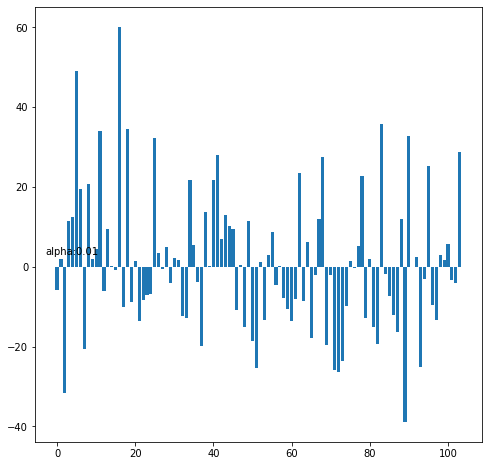

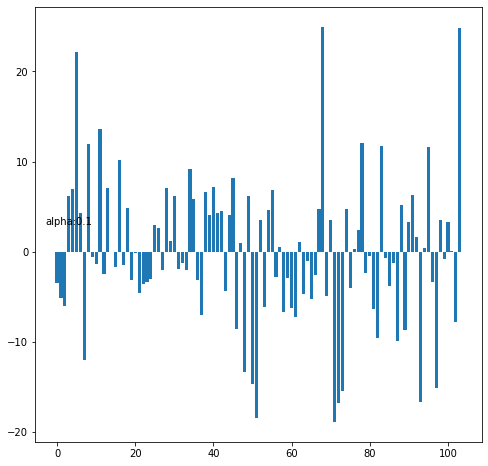

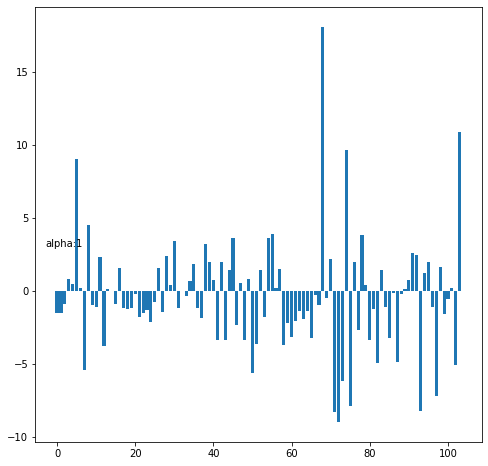

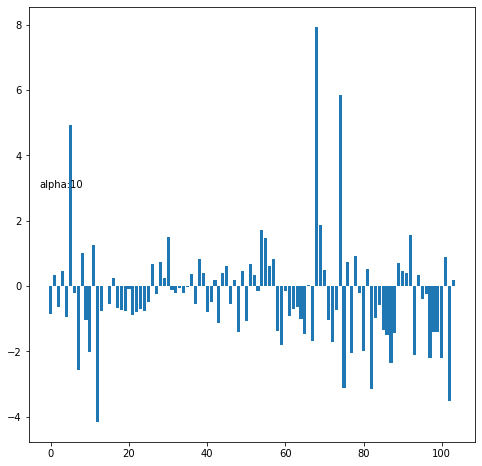

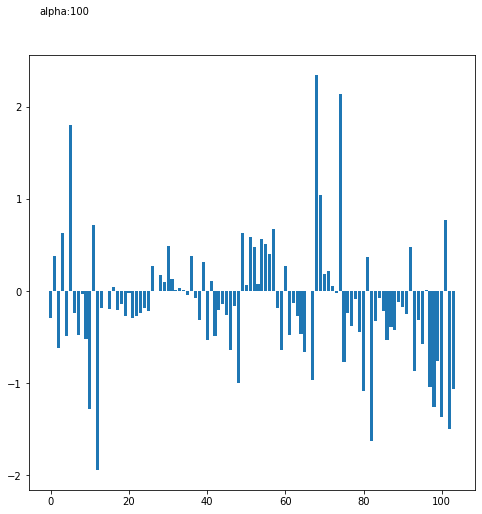

In [ ]:
ridge = None
alpha_list = [0.01, 0.1, 1, 10, 100]
best_score = -1 #초기값 아무거나ㅣ
ridge_best_params = {'alpha':0}

result = {
    'alpha': [],
    'score' : []

}
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_train, y_train)
  plt.figure(figsize = (8,8))
  plt.bar(range(ridge.coef_.shape[0]), ridge.coef_)
  plt.text(-3,3, 'alpha:{}'.format(alpha))
  result['alpha'].append(alpha)
  result['score'].append((ridge.score(X_train, y_train),ridge.score(X_test, y_test)))
  score = ridge.score(X_train, y_train)
  if best_score < score:
    best_score = score
    ridge_best_params['alpha'] = alpha

  plt.show()


# 알파값(람다값)이 커지면 커질 수록 wiehgt의 스케일이 0에 가까워진다 (But, 0은 되지 않는다!)

In [ ]:
ridge_best_params

{'alpha': 0.01}

In [ ]:
result

{'alpha': [0.01, 0.1, 1, 10, 100],
 'score': [(0.9315320809376442, 0.8345529304992887),
  (0.9120292678182622, 0.8510741726311931),
  (0.8661781004222802, 0.8276750146248378),
  (0.7689330544400338, 0.7262357393991342),
  (0.5669571803931394, 0.552772642005904)]}

In [ ]:
ridge = Ridge(alpha = 0.01).fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.9315320809376442, 0.8345529304992887)

### Lasso Regression

- linear regression cost function + L1 norm
- w에 절댓값을 취해서 규제를 걸어줌

- 규제가 심해질 수록 '0'이 되는 coef가 많음
 - 그 feature들의 value들은 의미가 없도록 만듦

- Lasso는 최종 prediction에 어떤 feature의 영향이 큰 지를 알기 쉬움  
=> 특성 선택의 효과가 있다!

- Ridge가 모델자체로는 더 많이 
 

In [ ]:
from sklearn.linear_model import Lasso

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.338875309416835, tolerance: 3.509685514851485
  positive)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1169.2726870725407, tolerance: 3.509685514851485
  positive)


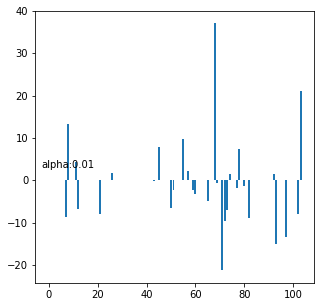

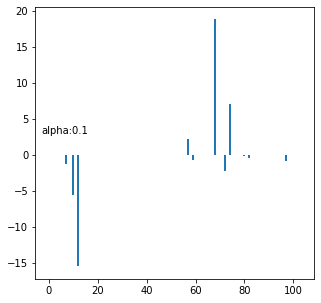

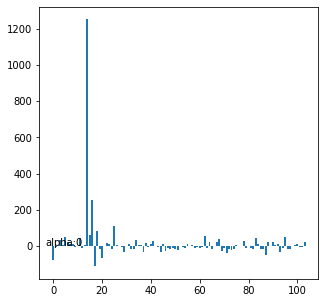

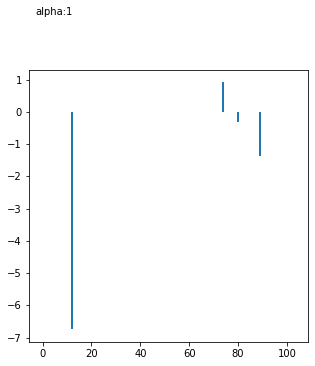

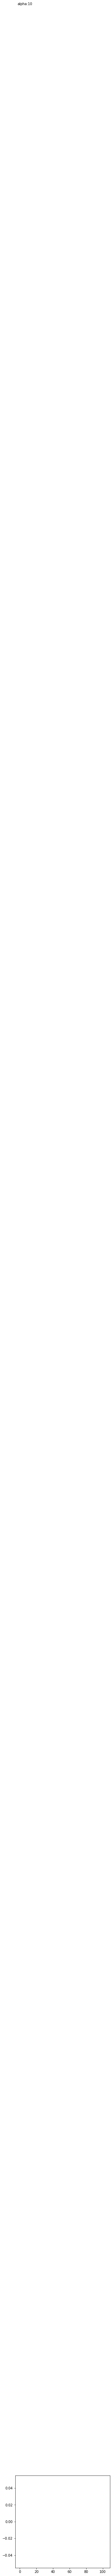

In [ ]:
alpha_list = [0.01, 0.1, 0, 1, 10]

for alpha in alpha_list:
  lasso = Lasso(alpha = alpha)
  lasso.fit(X_train, y_train)

  plt.figure(figsize = (5,5))
  plt.bar(range(ridge.coef_.shape[0]), lasso.coef_)
  plt.text(-3, 3, 'alpha:{}'.format(alpha))

### 3. ElasticNet

- 하이퍼파라미터 : L1 규제 + L2 규제
 - 람다 값은 서로 다를 수 있음. (비율로도 가능)

- elastic = Elastic(alpha, l1ratio)
 - alpha = 람다, l1ration = L1, L2 비율

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha = 0.1, l1_ratio = 0.3)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.3,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
elastic.score(X_train, y_train)

0.6831378250567532

In [ ]:
elastic.coef_

array([-3.25916231e-01,  2.47484759e-01, -5.68947403e-01,  6.28858024e-01,
       -5.41701468e-01,  3.39487184e+00, -0.00000000e+00, -1.14078772e+00,
        6.82912784e-05, -5.27378686e-01, -1.90451798e+00,  9.49019845e-01,
       -3.36584267e+00, -1.67139190e-01,  0.00000000e+00, -6.11534901e-02,
        0.00000000e+00, -1.04729124e-01, -2.49764254e-02, -2.67559250e-01,
       -0.00000000e+00, -3.18858732e-01, -2.58726257e-01, -1.89778706e-01,
       -8.01924781e-02, -5.04774372e-02,  1.83696273e-01, -0.00000000e+00,
        3.34562391e-02,  0.00000000e+00,  6.89706505e-01,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        2.60740456e-01, -0.00000000e+00, -0.00000000e+00,  1.08406362e-01,
       -5.86990069e-01,  0.00000000e+00, -1.71900567e-01, -1.75298338e-01,
        0.00000000e+00, -0.00000000e+00, -5.03720494e-01, -0.00000000e+00,
       -1.30824259e+00,  6.28905035e-01, -0.00000000e+00,  6.63576003e-01,
        3.35386222e-01,  

In [ ]:
from sklearn.model_selection import GridSearchCV

pagram_grid = {
    'alpha': [0.001, 0.1, 1, 10, 100],
    'l1_ratio' : np.arange(0.1, 1, 0.1)
}

In [ ]:
grid_elastic = GridSearchCV(ElasticNet(), param_grid= pagram_grid, cv = 5, n_jobs = -1, scoring ='neg_mean_squared_error' )

In [ ]:
grid_elastic.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1806.368677662661, tolerance: 3.509685514851485
  positive)


GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.1, 1, 10, 100],
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
# 모든 조합의 실행결과 
grid_elastic.cv_results_

{'mean_fit_time': array([0.04592576, 0.04355502, 0.04370365, 0.04350014, 0.04319148,
        0.04282799, 0.04216003, 0.04040289, 0.04045491, 0.00447979,
        0.00382671, 0.00346956, 0.00345063, 0.00420074, 0.00342917,
        0.00375137, 0.00292621, 0.0027185 , 0.00155392, 0.00218434,
        0.00162835, 0.00230527, 0.00159039, 0.00157266, 0.00306129,
        0.00165563, 0.00272822, 0.0024333 , 0.00134077, 0.00132742,
        0.00134211, 0.00154333, 0.00134048, 0.00124402, 0.00135374,
        0.00130019, 0.00135264, 0.00142131, 0.00139723, 0.0012506 ,
        0.00127945, 0.00155768, 0.00128126, 0.00124307, 0.00127831]),
 'mean_score_time': array([0.00074368, 0.00069332, 0.0006897 , 0.0006484 , 0.00067229,
        0.00066547, 0.00068154, 0.0006887 , 0.00069633, 0.00056939,
        0.00053267, 0.00076737, 0.00053577, 0.00052385, 0.00057721,
        0.00074301, 0.00055799, 0.0005641 , 0.00052462, 0.00055871,
        0.00058022, 0.00062251, 0.00054183, 0.00053811, 0.00055947,
        0.

In [ ]:
grid_elastic.best_params_

{'alpha': 0.001, 'l1_ratio': 0.6}

In [ ]:
model = grid_elastic.best_estimator_
model

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.6,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
model.score(X_train, y_train)

0.9039853976626643

In [ ]:
model.score(X_test, y_test)

0.8524597227918986

In [ ]:
# 모델 성능이 딱히 좋지 않음. 
# 더 좋은 모델을 찾으러 가거나 데이터 수집을 더하거나, 전처리를 다시하거나 